In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('Mall_Data.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df[['Annual Income (k$)','Spending Score (1-100)']]

In [4]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [5]:
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

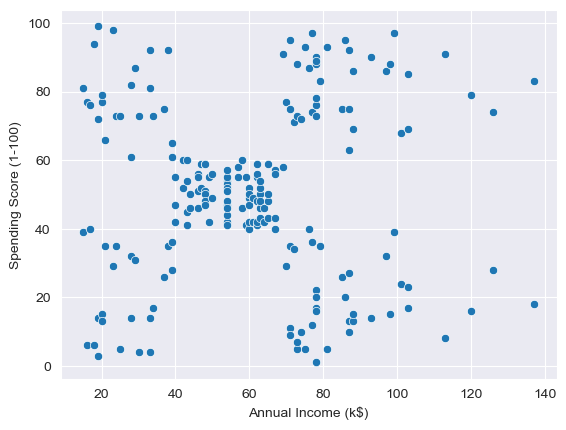

In [6]:
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'])

In [7]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [9]:
from sklearn.cluster import KMeans

In [10]:
km = KMeans()
y = km.fit_predict(x)


In [11]:
km.cluster_centers_

array([[ 0.11266195, -0.11881203],
       [-1.35185213, -1.19089759],
       [ 1.81769762,  1.26275949],
       [-1.35366972,  1.15873115],
       [ 0.73205646, -1.42897101],
       [-0.51846512,  0.02925159],
       [ 1.87564575, -1.09476801],
       [ 0.66703804,  1.23036618]])

In [12]:
x = pd.DataFrame(x)
x['Cluster'] = y
x

,0,1,Cluster
0,-1.738999,-0.434801,1
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,1
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,1
...,...,...,...
195,2.268791,1.118061,2
196,2.497807,-0.861839,6
197,2.497807,0.923953,2
198,2.917671,-1.250054,6


In [13]:
km.cluster_centers_

array([[ 0.11266195, -0.11881203],
       [-1.35185213, -1.19089759],
       [ 1.81769762,  1.26275949],
       [-1.35366972,  1.15873115],
       [ 0.73205646, -1.42897101],
       [-0.51846512,  0.02925159],
       [ 1.87564575, -1.09476801],
       [ 0.66703804,  1.23036618]])

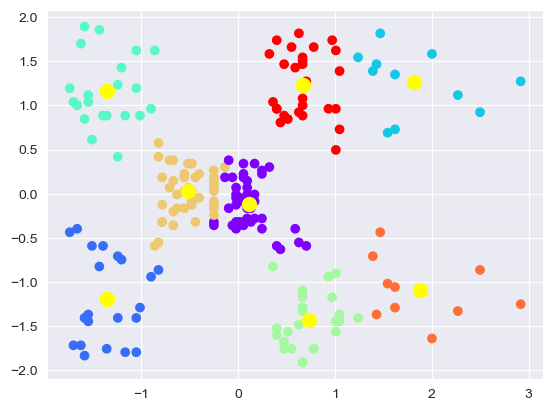

In [14]:
plt.scatter(x.iloc[:,0],x.iloc[:,1], c = x['Cluster'], cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 100)

In [22]:
x

,0,1,Cluster
0,-1.738999,-0.434801,1
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,1
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,1
...,...,...,...
195,2.268791,1.118061,2
196,2.497807,-0.861839,6
197,2.497807,0.923953,2
198,2.917671,-1.250054,6


In [23]:
x1 = x.iloc[:,:-1]
x1

,0,1
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


# Elbow Graph

In [19]:
wcss = []

for i in range(1,25):
    km = KMeans(n_clusters=i)
    km.fit_predict(x1)
    wcss.append(km.inertia_)

In [20]:
wcss

[400.0,
 269.0167937490666,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.10377812115057,
 44.91118554999014,
 37.17212373746481,
 32.36022982569204,
 29.061152995353442,
 26.023192237101007,
 23.685349284338127,
 21.57445782543121,
 19.81087882356879,
 17.797946155053197,
 16.411445207812726,
 15.006742169624292,
 13.918399369493125,
 13.303965224446348,
 12.184532712030173,
 11.091953093446417,
 10.749451472641308,
 10.143120607185148,
 9.419725510804218]

Text(0, 0.5, 'WCSS')

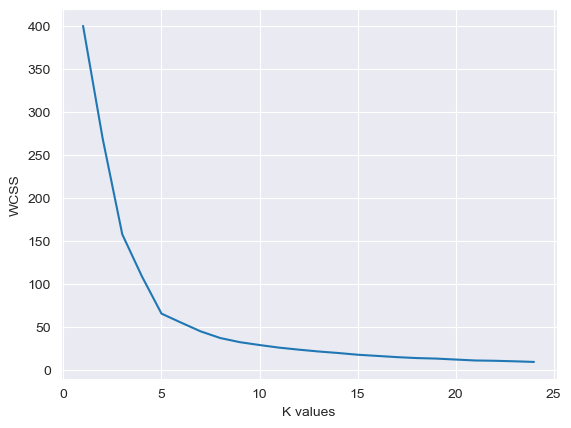

In [21]:
plt.plot(range(1,25), wcss)
plt.xlabel('K values')
plt.ylabel('WCSS')

In [24]:
km = KMeans(n_clusters=5)
y = km.fit_predict(x1)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [25]:
x1['Cluster'] = y

x1

,0,1,Cluster
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,2
196,2.497807,-0.861839,1
197,2.497807,0.923953,2
198,2.917671,-1.250054,1


In [26]:
km.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [-1.30751869, -1.13696536]])

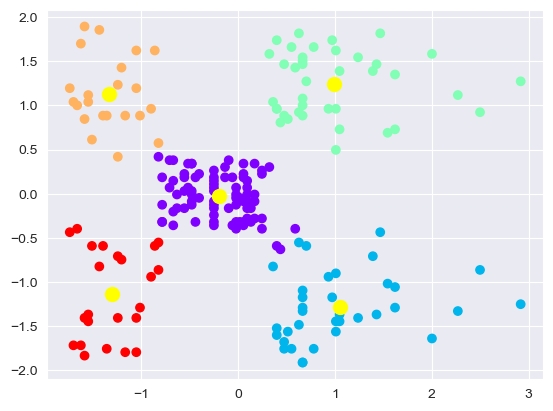

In [28]:
plt.scatter(x1.iloc[:,0], x.iloc[:,1], c = x1['Cluster'], cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow',s = 100)

In [30]:
df['Y'] = y
df

,Annual Income (k$),Spending Score (1-100),Y
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,1
197,126,74,2
198,137,18,1


In [32]:
df.groupby('Y').agg('mean')

,Annual Income (k$),Spending Score (1-100)
Y,,
0,55.296296,49.518519
1,88.200000,17.114286
2,86.538462,82.128205
3,25.727273,79.363636
4,26.304348,20.913043


In [33]:
df[df['Y'] == 1]

,Annual Income (k$),Spending Score (1-100),Y
124,70,29,1
128,71,11,1
130,71,9,1
134,73,5,1
136,73,7,1
138,74,10,1
140,75,5,1
144,77,12,1
146,77,36,1
148,78,22,1


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [35]:
df

,Annual Income (k$),Spending Score (1-100),Y
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,1
197,126,74,2
198,137,18,1


In [37]:
x = df.iloc[:,:-1]
y = df['Y']

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [39]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

In [40]:
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         5
           3       1.00      0.80      0.89         5
           4       1.00      0.75      0.86         8

    accuracy                           0.93        40
   macro avg       0.96      0.91      0.93        40
weighted avg       0.94      0.93      0.92        40

